#**Comparative analysis of heart disease prediction using logistic regression, SVM, KNN, and random forest with cross-validation for improved accuracy**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Loading the CSV data into a Pandas DataFrame from a URL
df = pd.read_csv('https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv')

# Display the first few rows of the DataFrame to inspect the data
df.head()

# Display concise summary of the DataFrame, including data types and non-null values
df.info()

# Display unique values for categorical features to understand their distribution
df["sex"].unique()
df["cp"].unique()
df["fbs"].unique()
df["restecg"].unique()
df["exang"].unique()
df["slope"].unique()
df["thal"].unique()
df["ca"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([0, 2, 1, 3, 4])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv')

# Define Features (X) and Target (y)
X = df.drop(columns=['target']) # All columns except 'target' are features
y = df['target'] # 'target' column is the label

# Split Data into training and testing sets (80% train, 20% test)
# stratify=y ensures that the proportion of target classes is the same in both train and test sets
# random_state=3 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=3
)

# Define Column Groups for numerical and categorical features
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

# Create a ColumnTransformer for preprocessing
# This handles Scaling for numerical columns (StandardScaler)
# AND One-Hot Encoding for categorical columns (OneHotEncoder) in one step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features), # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features) # Apply OneHotEncoder to categorical features
    ]
)

# Fit the preprocessor on the training data and transform both training and test data
# This returns numpy arrays after transformation
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# (Optional) Convert the processed numpy arrays back to DataFrames with readable column names
# Get feature names from the OneHotEncoder after fitting
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
# Combine numerical feature names with one-hot encoded categorical feature names
new_columns = num_features + list(ohe_feature_names)

X_train_df = pd.DataFrame(X_train_processed, columns=new_columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=new_columns, index=X_test.index)

# Check the shape of the processed training data and display its head
print("Training Data Shape:", X_train_df.shape)
print(X_train_df.head())

Training Data Shape: (242, 30)
          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
293  1.458910  1.133739 -0.712857 -0.014178 -0.200371    0.0    1.0   0.0   
120  1.122131 -0.107476  1.203235 -1.295080  0.797704    1.0    0.0   1.0   
288  0.336315 -1.235853  1.877026 -0.334403  1.629434    0.0    1.0   1.0   
53  -1.123059 -1.348690 -2.207830  1.129485 -0.366717    1.0    0.0   0.0   
89   0.448574 -1.800041  0.045157 -1.295080 -0.034025    1.0    0.0   1.0   

     cp_1  cp_2  ...  slope_2  thal_0  thal_1  thal_2  thal_3  ca_0  ca_1  \
293   0.0   1.0  ...      0.0     0.0     0.0     0.0     1.0   1.0   0.0   
120   0.0   0.0  ...      0.0     0.0     0.0     1.0     0.0   0.0   0.0   
288   0.0   0.0  ...      0.0     0.0     0.0     0.0     1.0   0.0   1.0   
53    0.0   1.0  ...      0.0     0.0     0.0     1.0     0.0   1.0   0.0   
89    0.0   0.0  ...      0.0     0.0     0.0     1.0     0.0   1.0   0.0   

     ca_2  ca_3  ca_4  
293   0.0   0.0   0

<Axes: >

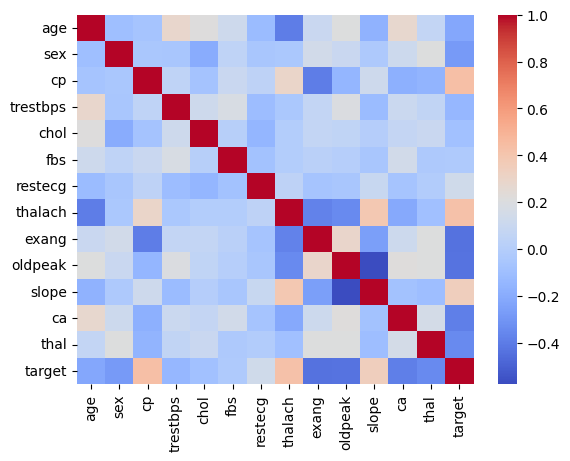

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap of the correlation matrix for the DataFrame
# 'cmap='coolwarm'' sets the color scheme for positive and negative correlations
sns.heatmap(df.corr(),cmap='coolwarm')

<Axes: >

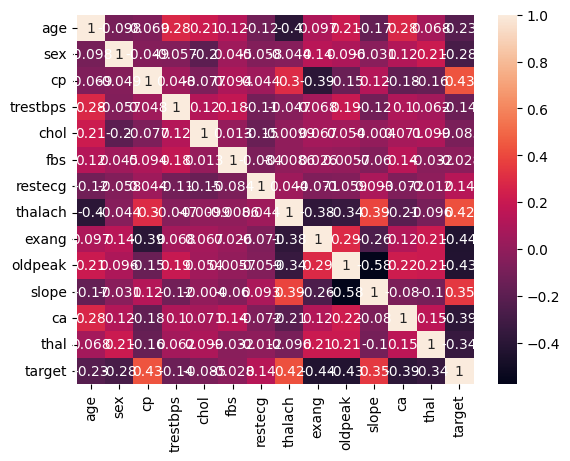

In [ ]:
sns.heatmap(df.corr(),annot=True) # Same as above, but with correlation values annotated on the heatmap

In [ ]:
# Define a list of machine learning models to be used for comparison
# LogisticRegression with increased max_iter for convergence
# SVC with a 'linear' kernel
# KNeighborsClassifier with default parameters
# RandomForestClassifier with default parameters
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Define a function to compare models using train-test split evaluation
def compare_models_train_test(models):
    for model in models:
        # Fit the model on the preprocessed training data
        model.fit(X_train_df, y_train)

        # Make predictions on the preprocessed test data
        test_data_prediction = model.predict(X_test_df)

        # Calculate and print the accuracy score
        accuracy = accuracy_score(y_test, test_data_prediction)
        print(f'Accuracy score of {model.__class__.__name__} = {accuracy:.4f}')

        # Print the classification report, which includes precision, recall, f1-score
        print("Classification report on TEST set:")
        print(classification_report(y_test, test_data_prediction))

        # Generate and display the confusion matrix for the model
        cm = confusion_matrix(y_test, test_data_prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()

Accuracy score of LogisticRegression = 0.8197
Classification report on TEST set:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy score of SVC = 0.7705
Classification report on TEST set:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Accuracy score of KNeighborsClassifier = 0.7869
Classification report on TEST set:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
       

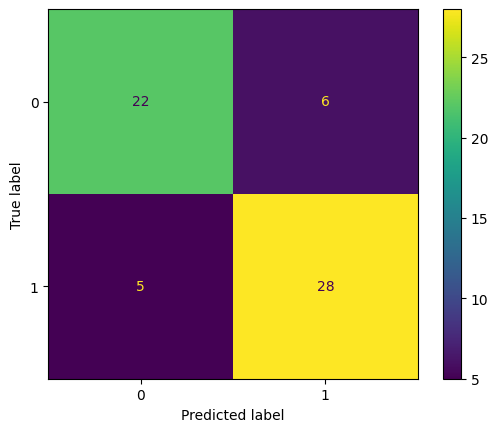

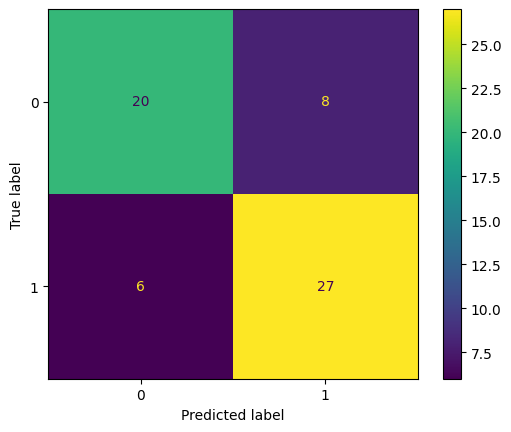

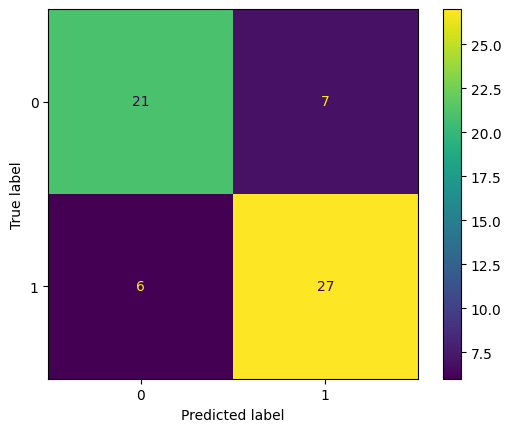

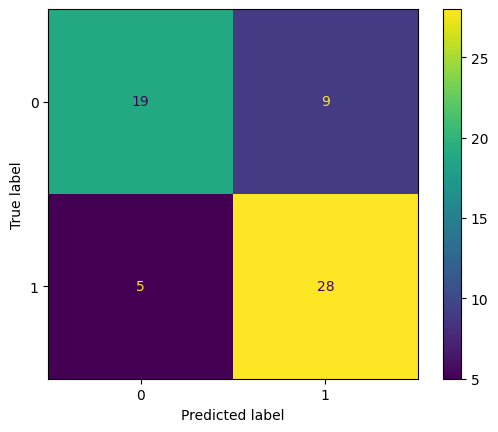

In [ ]:
# Call the function to compare the defined models using the train-test split approach
compare_models_train_test(models)

| Model             |Baseline Accuracy %|
|-----------------  |-------------------|
|Logistic regression|81.97              |
|Support vector     |77.05              |
|K-nearest neighbor |78.69              |
|Random forest      |77.05              |

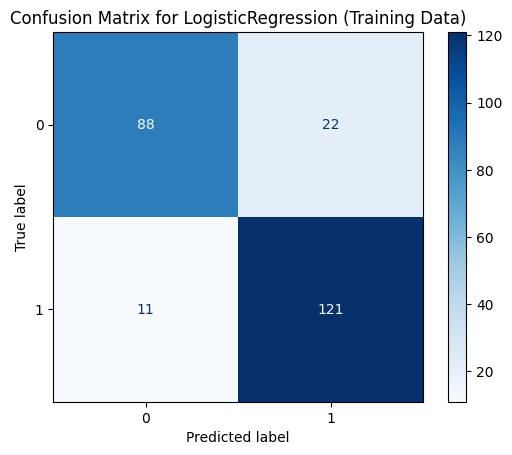

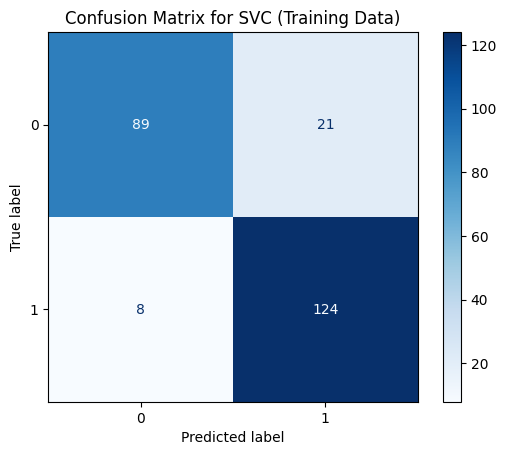

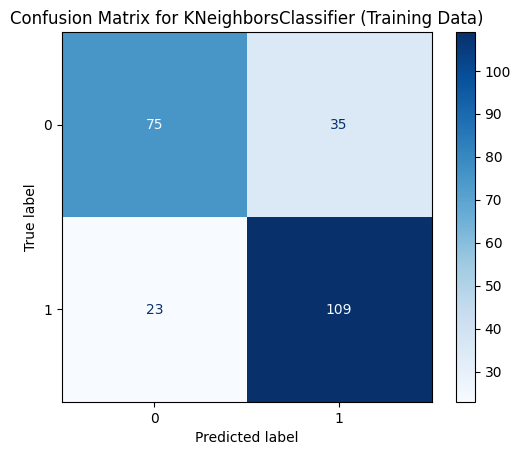

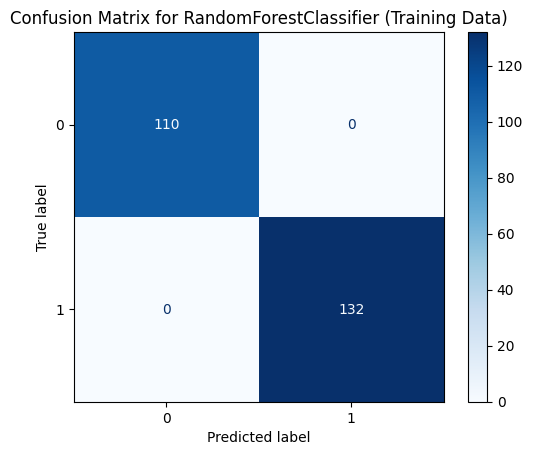

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Iterate through each model to plot its confusion matrix on the training data
for model in models:
        # Fit the model (already done in compare_models_train_test, but good practice if run standalone)
        # Note: This is fitting on X_train (unprocessed) which might lead to errors if the model expects preprocessed data
        # The correct approach would be to use the pipeline that includes preprocessing.
        model.fit(X_train, y_train)

        # Plot confusion matrix for training data
        ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {type(model).__name__} (Training Data)')
        plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Include Pipelines for every model.The Pipelines automate:
# 1. Preprocessing (Scaling/Encoding)
# 2. Model Fitting

In [ ]:
# The above accuracy is based on a single train-test split, which can have high variation.
# Therefore, we need to perform cross-validation, where the test sample differs in each of 5 iterations.
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a pipeline for Logistic Regression: Preprocessing -> Logistic Regression
lr_pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

# Perform 5-fold cross-validation on the training data (X_train, y_train)
# The pipeline handles both preprocessing and model training for each fold
cv_score_lr = cross_val_score(lr_pipeline, X_train, y_train, cv=5)
print(cv_score_lr)

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print(mean_accuracy_lr)

[0.85714286 0.87755102 0.72916667 0.89583333 0.85416667]
84.28


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create a pipeline for Support Vector Classifier: Preprocessing -> SVC
svc_pipeline = make_pipeline(preprocessor, SVC(kernel='linear'))

# Perform 5-fold cross-validation
cv_score_svc = cross_val_score(svc_pipeline, X_train, y_train, cv=5)

# Calculate and print the mean accuracy
mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)
mean_accuracy_svc = mean_accuracy_svc*100
mean_accuracy_svc = round(mean_accuracy_svc, 2)
print(mean_accuracy_svc)

83.47


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create a pipeline for K-Nearest Neighbors Classifier: Preprocessing -> KNeighborsClassifier
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())

# Perform 5-fold cross-validation
cv_score_knn = cross_val_score(knn_pipeline, X_train, y_train, cv=5)
print(cv_score_knn)

# Calculate and print the mean accuracy
mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)
mean_accuracy_knn = mean_accuracy_knn*100
mean_accuracy_knn = round(mean_accuracy_knn, 2)
print(mean_accuracy_knn)

[0.81632653 0.81632653 0.72916667 0.89583333 0.79166667]
80.99


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a pipeline for Random Forest Classifier: Preprocessing -> RandomForestClassifier
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier())

# Perform 5-fold cross-validation
cv_score_rf = cross_val_score(rf_pipeline, X_train, y_train, cv=5)
print(cv_score_rf)

# Calculate and print the mean accuracy
mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)
mean_accuracy_rf = mean_accuracy_rf*100
mean_accuracy_rf = round(mean_accuracy_rf, 2)
print(mean_accuracy_rf)

[0.85714286 0.79591837 0.77083333 0.89583333 0.8125    ]
82.64


In [ ]:
# List of models and their corresponding pipelines for cross-validation
models = [("Logistic Regression", lr_pipeline), ("SVC Linear", svc_pipeline), ("KNN", knn_pipeline), ("Random Forest", rf_pipeline)]

# Define a function to compare models using cross-validation
def compare_models_cross_validation():
    for model_name, pipeline in models:
     # Perform 5-fold cross-validation on each pipeline
     cv_score = cross_val_score(pipeline, X_train, y_train, cv=5)

     # Calculate the mean accuracy from the cross-validation scores
     mean_accuracy = sum(cv_score)/len(cv_score)
     mean_accuracy = mean_accuracy*100
     mean_accuracy = round(mean_accuracy, 2)

     # Print the individual cross-validation scores and the mean accuracy
     print('Cross Validation accuracies for ', model_name, '=  ', cv_score)
     print('Accuracy % of the ', model_name, mean_accuracy)
     print('----------------------------------------------')

In [ ]:
# Call the function to compare models using cross-validation
compare_models_cross_validation()

Cross Validation accuracies for  Logistic Regression =   [0.85714286 0.87755102 0.72916667 0.89583333 0.85416667]
Accuracy % of the  Logistic Regression 84.28
----------------------------------------------
Cross Validation accuracies for  SVC Linear =   [0.83673469 0.83673469 0.79166667 0.89583333 0.8125    ]
Accuracy % of the  SVC Linear 83.47
----------------------------------------------
Cross Validation accuracies for  KNN =   [0.81632653 0.81632653 0.72916667 0.89583333 0.79166667]
Accuracy % of the  KNN 80.99
----------------------------------------------
Cross Validation accuracies for  Random Forest =   [0.87755102 0.75510204 0.79166667 0.91666667 0.79166667]
Accuracy % of the  Random Forest 82.65
----------------------------------------------


|Model/iteration    | 1  | 2 | 3 | 4 | 5 | Average Accuracy %|
|-----------------  |--- |---|---|---|---|-------------------|
|Logistic regression|86  |88 |73 |90 |85 |84.28              |
|Support vector     |84  |84 |79 |90 |81 |83.47              |
|K-nearest neighbor |82  |82 |73 |90 |79 |80.99              |
|Random forest      |88  |76 |79 |92 |79 |82.65              |


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, make_scorer

# Define a function to compare models using cross-validation with recall as the scoring metric
def compare_models_cross_validation_recall():
    for model_name, pipeline in models:
     # Perform 5-fold cross-validation, scoring by 'recall'
     cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

     # Calculate the mean recall from the cross-validation scores
     mean_recall = sum(cv_score)/len(cv_score)
     mean_recall = mean_recall*100
     mean_recall = round(mean_recall, 2)

     # Print the individual cross-validation recall scores and the mean recall
     print('Cross Validation recall for ', model_name, '=  ', cv_score)
     print('Recall % of the ', model_name, mean_recall)
     print('----------------------------------------------')

In [ ]:
# Call the function to compare models based on recall using cross-validation
compare_models_cross_validation_recall()

Cross Validation recall for  Logistic Regression =   [0.88888889 0.85185185 0.76923077 0.96153846 0.80769231]
Recall % of the  Logistic Regression 85.58
----------------------------------------------
Cross Validation recall for  SVC Linear =   [0.88888889 0.77777778 0.88461538 0.96153846 0.80769231]
Recall % of the  SVC Linear 86.41
----------------------------------------------
Cross Validation recall for  KNN =   [0.88888889 0.81481481 0.80769231 0.92307692 0.80769231]
Recall % of the  KNN 84.84
----------------------------------------------
Cross Validation recall for  Random Forest =   [0.85185185 0.74074074 0.88461538 0.96153846 0.76923077]
Recall % of the  Random Forest 84.16
----------------------------------------------


| Model/iteration   | 1  | 2 | 3 | 4 | 5 | Average Recall %|
|-----------------  |--- |---|---|---|---|-----------------|
|Logistic regression|89  |85 |77 |96 |81 |85.58            |
|Support vector     |89  |78 |88 |96 |81 |86.41            |
|K-nearest neighbor |89  |81 |81 |92 |81 |84.84            |
|Random forest      |85  |74 |88 |96 |77 |86.16            |


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

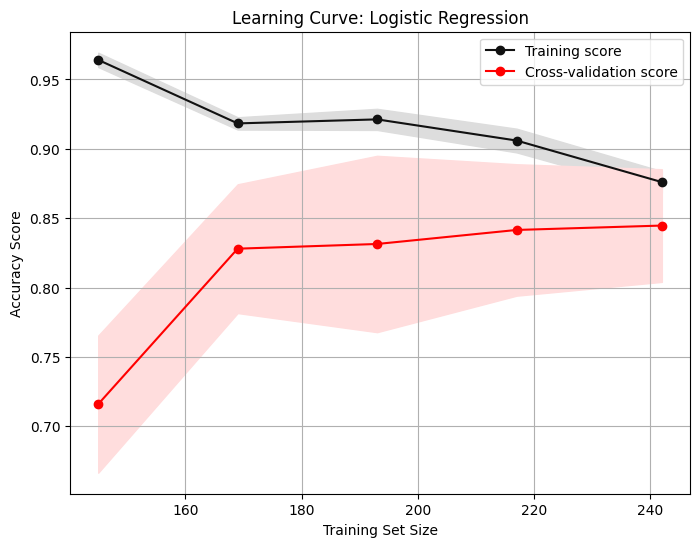

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

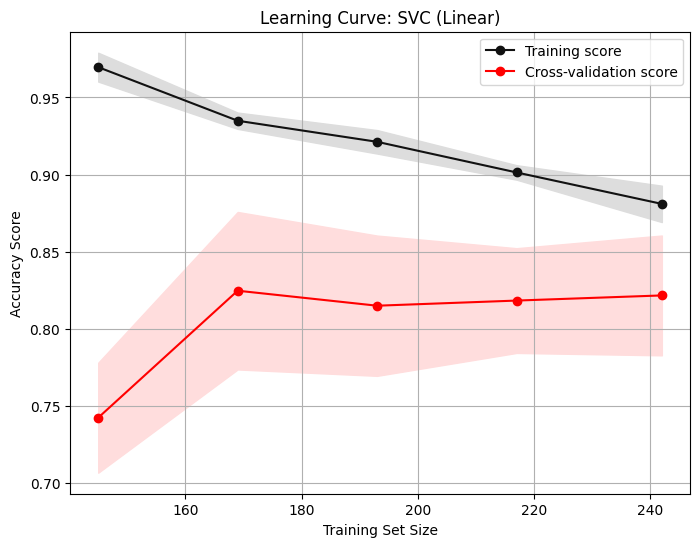

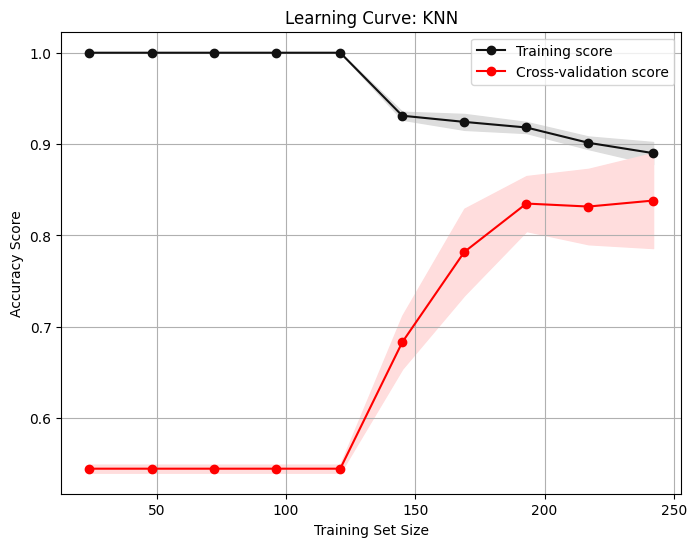

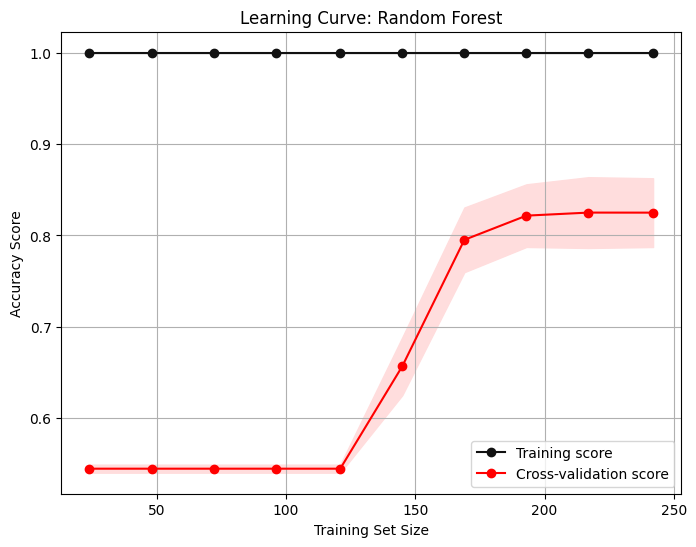

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves for a given estimator
def plot_learning_curve(estimator, title, X, y, cv=5):
    # Calculate training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10) # Generate 10 different sizes from 10% to 100% of training data
    )

    # Calculate mean and standard deviation for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="#111111", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="red", label="Cross-validation score")

    # Fill the area between (mean - std) and (mean + std) to show variance
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#FFDDDD")

    # Add title, labels, legend, and grid
    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot learning curves for each defined pipeline using the original X and y data
# Note: The pipelines 'lr_pipeline', 'svc_pipeline', etc. encapsulate the preprocessing steps.
# X and y here refer to the raw features and target, which the pipeline will preprocess internally.
plot_learning_curve(lr_pipeline, "Logistic Regression", X, y)
plot_learning_curve(svc_pipeline, "SVC (Linear)", X, y)
plot_learning_curve(knn_pipeline, "KNN", X, y)
plot_learning_curve(rf_pipeline, "Random Forest", X, y)

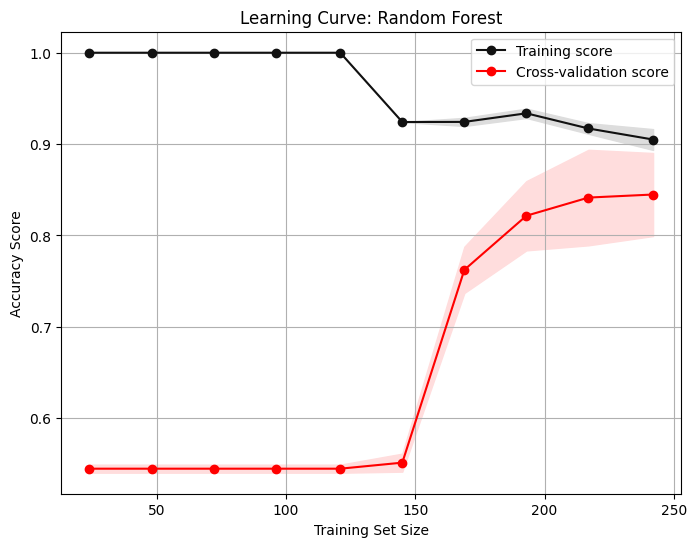

In [ ]:
# Re-define the Random Forest pipeline with specific hyperparameters for addressing overfitting issue
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=42))

# Update the list of models with the modified Random Forest pipeline
models = [("Logistic Regression", lr_pipeline), ("SVC Linear", svc_pipeline), ("KNN", knn_pipeline), ("Random Forest", rf_pipeline)]

# Plot the learning curve specifically for the re-configured Random Forest pipeline
plot_learning_curve(rf_pipeline, "Random Forest", X, y)

## **Introducing GridSearch for Hyperparameter Optimization**

After comparing the models using **5-fold cross-validation**, we conclude that the **Support Vector Classifier (SVC)** is the best-performing model, achieving an **average accuracy of 86.41%** across all folds and a **maximum accuracy of 96%**.

In the context of deploying the model in a **clinical environment**, performance alone is not sufficient. Particular emphasis must be placed on **patient safety**, which can be evaluated using the **recall** metric. A **low recall** indicates that the model fails to identify **actual patients with heart disease**, resulting in **false negatives**, which are especially critical in medical applications.

For this reason, **recall** is considered a **more crucial evaluation metric than accuracy** when classifying heart disease data.

To address this, we introduce **hyperparameter optimization using GridSearch**, incorporating a **minimum recall threshold of ≥ 90%**. The objective is to identify models that achieve an **average recall exceeding this threshold under 5-fold cross-validation**, while simultaneously applying the methodology previously discussed for **maximizing average accuracy**.

This combined evaluation strategy ensures that the selected model maintains both **high predictive performance** and **clinical reliability**.

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_models_recall():
    """
    Performs hyperparameter tuning for each model to maximize Recall.
    Returns a dictionary of the best models found.
    """

    # Define parameter grids for hyperparameter tuning for each model
    # Note: Since make_pipeline was used, step names are the lowercase class names (e.g., 'logisticregression__C').
    param_grids = {
        "Logistic Regression": {
            'logisticregression__C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
            'logisticregression__solver': ['liblinear', 'lbfgs'] # Algorithm to use in the optimization problem
        },
        "SVC Linear": {
            'svc__C': [0.1, 1, 10, 100], # Regularization parameter
            'svc__kernel': ['linear', 'rbf'], # Specifies the kernel type to be used in the algorithm
            'svc__gamma': ['scale', 'auto'] # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
        },
        "KNN": {
            'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 15], # Number of neighbors to use
            'kneighborsclassifier__weights': ['uniform', 'distance'], # Weight function used in prediction
            'kneighborsclassifier__metric': ['euclidean', 'manhattan'] # Distance metric to use
        },
        "Random Forest": {
            'randomforestclassifier__n_estimators': [50, 100, 200], # Number of trees in the forest
            'randomforestclassifier__max_depth': [None, 10, 20], # Maximum depth of the tree
            'randomforestclassifier__min_samples_split': [2, 5, 10] # Minimum number of samples required to split an internal node
        }
    }

    best_estimators = {}

    print("Hyperparameter Tuning (Scoring: Recall)")
    print("=" * 40)

    for model_name, pipeline in models:
        if model_name in param_grids:
            print(f"Tuning {model_name}...")

            # Initialize GridSearchCV for exhaustive search over specified parameter values
            grid_search = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grids[model_name],
                cv=5, # 5-fold cross-validation
                scoring='recall', # Maximizing Recall as requested for evaluation
                n_jobs=-1,        # Use all available CPU cores for parallel processing
                verbose=0 # Suppress verbose output
            )

            # Fit GridSearchCV on the training data
            # The pipeline handles preprocessing of X_train internally during fitting
            grid_search.fit(X_train, y_train)

            # Store and print the best recall score and corresponding best parameters
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_

            print(f"  Best Recall: {best_score:.2%}")
            print(f"  Best Params: {best_params}")
            print("-" * 40)

            # Store the best estimator (model with best hyperparameters) found by GridSearchCV
            best_estimators[model_name] = grid_search.best_estimator_
        else:
            print(f"Skipping {model_name} (No parameter grid defined)")

    return best_estimators

# Execute the hyperparameter tuning process
best_models_dict = tune_models_recall()

Hyperparameter Tuning (Scoring: Recall)
Tuning Logistic Regression...
  Best Recall: 90.88%
  Best Params: {'logisticregression__C': 0.01, 'logisticregression__solver': 'lbfgs'}
----------------------------------------
Tuning SVC Linear...
  Best Recall: 90.88%
  Best Params: {'svc__C': 0.1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
----------------------------------------
Tuning KNN...
  Best Recall: 90.17%
  Best Params: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'uniform'}
----------------------------------------
Tuning Random Forest...
  Best Recall: 86.38%
  Best Params: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
----------------------------------------


In [ ]:
# Update the global 'models' list with the tuned versions from the previous step
# best_models_dict is the dictionary containing the best estimators found during tuning
models = list(best_models_dict.items())

print("Evaluating Accuracy of Recall-Optimized Models")
print("==============================================")

# Run the existing 'compare_models_cross_validation' function.
# This will now calculate the Cross-Validation Accuracy for the models
# that were specifically tuned to maximize Recall in the previous step.
compare_models_cross_validation()

Evaluating Accuracy of Recall-Optimized Models
Cross Validation accuracies for  Logistic Regression =   [0.83673469 0.85714286 0.75       0.83333333 0.77083333]
Accuracy % of the  Logistic Regression 80.96
----------------------------------------------
Cross Validation accuracies for  SVC Linear =   [0.83673469 0.87755102 0.72916667 0.83333333 0.72916667]
Accuracy % of the  SVC Linear 80.12
----------------------------------------------
Cross Validation accuracies for  KNN =   [0.87755102 0.83673469 0.79166667 0.89583333 0.8125    ]
Accuracy % of the  KNN 84.29
----------------------------------------------
Cross Validation accuracies for  Random Forest =   [0.85714286 0.85714286 0.79166667 0.89583333 0.83333333]
Accuracy % of the  Random Forest 84.7
----------------------------------------------


## **Model Selection Based on Recall-Constrained Hyperparameter Tuning**

Hyperparameter tuning was performed using **recall as the primary scoring metric**, reflecting the clinical priority of minimizing **false negatives**. A **minimum average recall threshold of ≥ 90%** was imposed across **5-fold cross-validation**.

The results indicate that **Logistic Regression**, **Support Vector Classifier (SVC)**, and **K-Nearest Neighbors (KNN)** successfully satisfy the recall constraint, while **Random Forest** fails to meet the minimum recall requirement and is therefore excluded from further consideration.

To finalize model selection, the **accuracy of the recall-optimized models** was subsequently evaluated using **5-fold cross-validation**.

Among the recall-compliant models:
- **KNN** achieved the **highest average accuracy 84.29%.**
- **Logistic Regression** followed with an average accuracy of **80.96%.**
- **SVC** exhibited the lowest average accuracy at **80.12%.**

Based on this two-stage evaluation strategy—**recall-constrained optimization followed by accuracy comparison**—the **K-Nearest Neighbors (KNN)** model is selected as the preferred model. This choice offers the **best trade-off between clinical safety (high recall)** and **predictive performance (accuracy)** under cross-validation.
